In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    recall_score,
    precision_score,
    f1_score,
    balanced_accuracy_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from model import LogRegCCD
from dataset import generate_synth_dataset


In [2]:
breast_df = pd.read_csv('breast.csv')
prostate_df = pd.read_csv('prostate.csv')

In [ ]:
breast_df.rename(columns={'Class': 'class'}, inplace=True)
breast_df['class'] = breast_df['class'].map({'non-relapse': 0, 'relapse': 1})
prostate_df['class'] = prostate_df['class'].replace(1, 0).replace(2,1)

class
0    52
1    50
Name: count, dtype: int64
class
0    51
1    46
Name: count, dtype: int64
12601
24482


In [40]:
lambdas = np.logspace(-4, 2, 10)
logreg_ccd1 = LogRegCCD(lambdas)

In [ ]:
X_prostate, y_prostate = prostate_df.drop(columns=['class']).values, prostate_df['class'].values
X_train_prostate, X_temp_prostate, y_train_prostate, y_temp_prostate = train_test_split(X_prostate, y_prostate, test_size=0.4, random_state=42)
X_valid_prostate, X_test_prostate, y_valid_prostate, y_test_prostate = train_test_split(X_temp_prostate, y_temp_prostate, test_size=0.5, random_state=42)

61
20
(61,)
(20,)


In [10]:
logreg_ccd1.fit(X_train_prostate, y_train_prostate)

In [11]:
logreg_ccd1.validate(X_valid_prostate, y_valid_prostate)

In [ ]:
coef_prostate_ccd = logreg_ccd1.best_coef_
index_prostate = [i for i in range(len(coef_prostate_ccd))]

[0. 0. 0. ... 0. 0. 0.]


In [13]:
lr1 = LogisticRegression(penalty=None)

In [ ]:
lr1.fit(X_train_prostate, y_train_prostate)
coef_prostate_lr = lr1.coef_[0]

[-2.52940688e-05  2.03523909e-05  1.86017186e-05 ...  9.00425267e-05
  2.17367731e-04  1.62364180e-04]


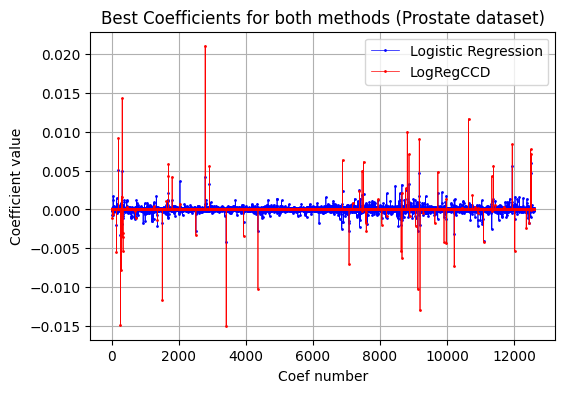

In [66]:
plt.figure(figsize=(6, 4))
plt.plot(index_prostate, coef_prostate_lr, marker='o', linestyle='-', label="Logistic Regression", color='blue', linewidth=0.5, markersize=1)
plt.plot(index_prostate, coef_prostate_ccd, marker='o', linestyle='-', label="LogRegCCD", color='red', linewidth=0.5, markersize=1)
plt.xlabel('Coef number')
plt.ylabel("Coefficient value")
plt.title(f"Best Coefficients for both methods (Prostate dataset)")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
logreg_ccd2 = LogRegCCD(lambdas)
lr2 = LogisticRegression(penalty=None)

In [ ]:
X_breast, y_breast = breast_df.drop(columns=['class']).values, breast_df['class'].values
X_train_breast, X_temp_breast, y_train_breast, y_temp_breast = train_test_split(X_breast, y_breast, test_size=0.4, random_state=42)
X_valid_breast, X_test_breast, y_valid_breast, y_test_breast = train_test_split(X_temp_breast, y_temp_breast, test_size=0.5, random_state=42)

24481
24481
(58,)
(19,)


In [47]:
logreg_ccd2.fit(X_train_breast, y_train_breast)

In [49]:
logreg_ccd2.validate(X_valid_breast, y_valid_breast)

In [ ]:
coef_breast_ccd2 = logreg_ccd2.best_coef_
index_breast = [i for i in range(len(coef_breast_ccd2))]

[-0.03024916  0.          0.         ...  0.          0.
  0.        ]


In [60]:
lr2.fit(X_train_breast, y_train_breast)
coef_breast_lr2 = lr2.coef_[0]

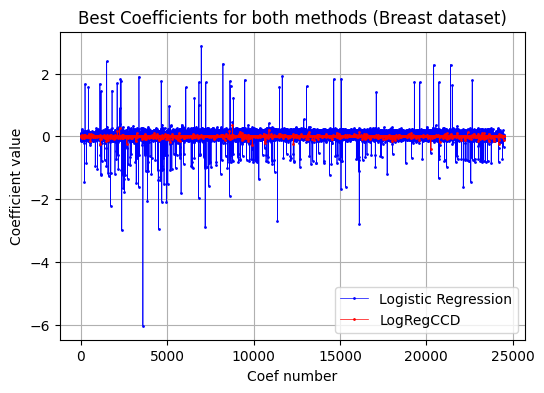

In [61]:
plt.figure(figsize=(6, 4))
plt.plot(index_breast, coef_breast_lr2, marker='o', linestyle='-', label="Logistic Regression", color='blue', linewidth=0.5, markersize=1)
plt.plot(index_breast, coef_breast_ccd2, marker='o', linestyle='-', label="LogRegCCD", color='red', linewidth=0.5, markersize=1)
plt.xlabel('Coef number')
plt.ylabel("Coefficient value")
plt.title(f"Best Coefficients for both methods (Breast dataset)")
plt.legend()
plt.grid(True)
plt.show()